## Example: Reading 2D tabular data (DataFrame) 

This example illustrates the how to read 2D tabular data using the HydroMT [DataCatalog](../_generated/hydromt.data_catalog.DataCatalog.rst) with the `csv` and `excel` and `fwf` drivers.

In [2]:
# import hydromt and setup logging
import hydromt
from hydromt.log import setuplog
import pandas as pd

logger = setuplog("read point location data", log_level=10)

2023-01-27 10:48:39,166 - read point location data - log - INFO - HydroMT version: 0.6.1.dev


In [3]:
data_catalog = hydromt.DataCatalog("data/tabular_data_catalog.yml" , logger=logger)

2023-01-27 10:48:39,229 - read point location data - data_catalog - INFO - Parsing data catalog from data/tabular_data_catalog.yml


## CSV driver 

To read 2D tabular data from a comma-separated file (ano) and parse it into a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) we use the [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 

For demonstration we use a dummy example data. 

In [4]:
# inspect data source entry in data catalog yaml file
data_catalog["example_csv_data"]

data_type: DataFrame
driver: csv
path: c:\Users\jong\Projects\hydromt\examples\data\example_csv_data.csv

We can load any 2D tabular data using [DataCatalog.get_dataframe()](../_generated/hydromt.data_adapter.DataCatalog.get_dataframe.rst). Note that if we don't provide any arguments it returns the full dataframe. 

In [5]:
ds = data_catalog.get_dataframe("example_csv_data")
ds

2023-01-27 10:48:39,461 - read point location data - data_catalog - INFO - DataCatalog: Getting example_csv_data DataFrame csv data from c:\Users\jong\Projects\hydromt\examples\data\example_csv_data.csv
2023-01-27 10:48:39,462 - read point location data - dataframe - INFO - DataFrame: Read csv data.


,time,col1,col2
0,2016-01-01,0.590860,0.591380
1,2016-01-02,0.565552,0.571342
2,2016-01-03,0.538679,0.549770
3,2016-01-04,0.511894,0.526932
4,2016-01-05,0.483989,0.502907
...,...,...,...
2011,2021-07-04,0.271673,0.287093
2012,2021-07-05,0.249286,0.265656
2013,2021-07-06,0.224985,0.243299
2014,2021-07-07,0.199994,0.220004


The data can be visualized with the [.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) pandas method. 

<AxesSubplot: xlabel='time'>

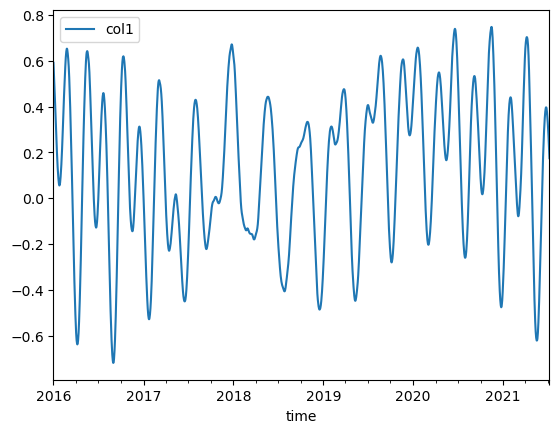

In [6]:
ds["time"] = pd.to_datetime(ds["time"], format="%Y-%m-%d")
ds.plot(x="time", y="col1")

## Excel driver

To read tabular data from excel files and parse it into a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object we use the [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel) method.

In [7]:
# Note that this is only example data 
data_catalog["dummy_excel_data"]

data_type: DataFrame
driver: xlsx
path: c:\Users\jong\Projects\hydromt\examples\data\dummy_excel_data.xlsx

In [8]:
df = data_catalog.get_dataframe("dummy_excel_data")
df

2023-01-27 10:48:48,387 - read point location data - data_catalog - INFO - DataCatalog: Getting dummy_excel_data DataFrame xlsx data from c:\Users\jong\Projects\hydromt\examples\data\dummy_excel_data.xlsx
2023-01-27 10:48:48,389 - read point location data - dataframe - INFO - DataFrame: Read xlsx data.


,Unnamed: 0,col1,col2,col3
0,0,74,50,69
1,1,4,95,22
2,2,20,20,23
3,3,33,94,84
4,4,34,40,90
5,5,22,42,66
6,6,6,34,94
7,7,31,20,72
8,8,89,76,46
9,9,3,71,6
